# Cleaning And Analyzing Employee Exit Surveys

This project was completed as part of the Data Analyst series of [Dataquest](https://www.dataquest.io/directory/) on 09/26/19

<br/><br/>**Goal:** Our aim in this project is look at the 
[Department of Education and Training](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) survey's from Queensland, as well as the Technical and Further Education (TAFE) department's exit surveys. First survey: [DETE Employee Exit Survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) Second Survey: [TAFE Employee Exit Survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). We will look at whether there is a difference in resignation reasons for employees based off time employed at the same company.  Subsequently we will explore if young or old employees are resigning due to dissatisfaction.



In [327]:
import pandas as pd
import numpy as np

# Read in the csv file as a pandas dataframe
dete_survey = pd.read_csv('/Users/pgladkevich/Desktop/coding/projects/datasets/exit-surveys/dete-exit-survey-january-2014.csv')
print(dete_survey.info())
dete_survey.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [328]:
tafe_survey = pd.read_csv('/Users/pgladkevich/Desktop/coding/projects/datasets/exit-surveys/tafe-employee-exit-survey-access-database-december-2013.csv', encoding='ISO-8859-1')
print(tafe_survey.info())
tafe_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The dataframe.info() and dataframe.head() methods provide us a lot of useful information about each of the two datasets. The two surveys combined will be useful for an analysis of worker satisfaction and reasons for leaving a company. There are some distinctions in the formatting of the data between the two datasets. For example, in the DETE Employee exit survey in the "DETE Start Date" or the "Role Start Date" columns we can see that instead of NaN there will be 'Not Stated'. Additionally, instead of NaN values are sometimes n/a. In general there are also many columns not needed for our analysis, and there are duplicate columns between the two datasets with different names. Lastly, there are many columns that can apply to dissatisfaction such as "Job dissatisfaction, Dissatisfaction with the department, Lack of recognition, Lack of job security, etc." We will have to perform data cleaning before proceeding with the analysis.

# Identify Missing Values and Drop Unneccessary Columns

To begin the cleaning process we will convert 'Not Stated' values in the DETE dataframe columns, and drop unneeded columns from the two dataframes.

In [329]:
# We will use the na_values parameter to register additional strings to recognize as NA/NaN
dete_survey = pd.read_csv('/Users/pgladkevich/Desktop/coding/projects/datasets/exit-surveys/dete-exit-survey-january-2014.csv' , na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [330]:
# Now we will drop columns with the dataframe.drop() method
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
# Double-check that the updated dataframes no longer have the unneeded columns
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


In the above work we converted the values of 'Not Stated' to NaN and we made sure that we dropped unneeded columns from both of the survey dataframes. After we completed each of these tasks we double-checked our work by either displaying the head (first five rows) of the dataframe, or by checking the shape of the dataframe (rows,columns). As expected the DETE dataframe now contains only 35 columns while the TAFE dataframe has 23. 

# Rename Columns
Now in order to accurately compare data between the two surveys we need to convert the column names to a standard.

In [331]:
# Change the column names in DETE to snake_case
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
# Check that the column naming got updated
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [332]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [333]:
# Now we will change the column names in TAFE to match those in DETE using dataframe.rename()
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Had to perform a workaround since three column names had hidden characters that were bugging the rename code
tafe_survey_updated.columns = ['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'gender', 'age', 'employment_status','position', 'institute_service', 'role_service']

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now the columns in the two dataframes are standardized. We needed to perform an unelegant hard-coded reset of the column names since three columns had hidden '††††' characters that were messing up the rename code.

# Filter the Data

Now we will look compare dissatisfaction and time employed in regard to resignations. Since we are only looking at resignations we will take only values in the 'separationtype' column equivalent to 'Resignation'

In [334]:
# Check Tafe for Resignation variations
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [335]:
# Check Dete for Resignation variations
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [336]:
# Change the three types of resignations to 'Resignation' to match Tafe data
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Make new dataframes that only have 'Resignation' as a 'separationtype'
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

dete_resignations.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [337]:
tafe_resignations.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


# Verify the Data
Before we proceed with further analysis let us first verify that the data in the dataframes makes sense. Since the 'ceasedate' column value should be after 'dete_start_date' we can eliminate these values if they exist in small quantities. Additionally, since a person is usually employed in their 20s if there are a lot of values in 'dete_start_date' below 1940 this could be an issue as that would either mean a lot of the data is from workers that are over 90. Since this is highly unlikely to be representative it is more likely an anomaly if there are large numbers of values like this present.

In [338]:
# Observe the unique values of the 'cease_date' column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [339]:
# Extract the year only from cease_date
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract('([0-9]{4})',expand=False).astype(float)

# Check for unique years
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [340]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [341]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The 'cease_date' values in dete_resignations and tafe_resignations differ. For example, tafe_resignations has values in 2009, while DETE does not. Additionally, TAFE doesn't have values in 2006 while DETE does. We are not performing an analysis by year so this will not matter and we can leave the data as is.

# Create a New Column
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service. Since TAFE already has a column titled 'institute_service' we will create a new column in 'dete_resignations'

In [342]:
# Create the new column by subtracting start date from cease date
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

# Check the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Identify Dissatisfied Employees
Here are columns that we have identified as relating to an employee's dissatisfaction.

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
<br></br>
2. dafe_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If an employee indicated the factors above caused them to resign, we'll mark them as dissatisfied in a new column. The new dissatisfied column will contain the following values:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [343]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [344]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [345]:
# Write a function to change the above columns to boolean values
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
# Apply the function we wrote using df.applymap() and then use df.any() to create a new column of booleans
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis='columns',skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)



False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [346]:
# Since the DETE columns related to dissatisfaction are already boolean values we can proceed
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis='columns',skipna=False)
dete_resignations_up = dete_resignations.copy()

# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

# Combining the Data
Since we have now ensured that we can identify which dataset a row comes from we can proceed with combining the two datasets into one. To do this we will need to drop any rows that are all missing values  so all information is available for any row. 

In [347]:
# Add column institute to both dataframes
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine the two dataframes
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index = True, sort=True)
combined_updated = combined.dropna(thresh=500, axis='columns').copy()
combined_updated.head()


,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation


# Clean the Service Column
Although we have dropped any rows that have no data entered, we have not yet sorted it to prepare for analysis. In the column 'institute_service' it is necesarry to categorize the data to make plot it as a bar chart. The categories will be established as follows

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [348]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [349]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)',expand=False).astype('float')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts(dropna=False)


1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [350]:
def years_to_stages(year):
    if year >= 11:
        return "Veteran"
    elif 7 <= year < 11:
        return "Established"
    elif 3 <= year < 7:
        return "Experienced"
    elif pd.isnull(year):
        return np.nan
    else:
        return "New"

combined_updated['service_cat']=combined_updated['institute_service_up'].apply(years_to_stages)

# Check the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

# Perform Analysis
Now that we have updated our categories we can convert the remaining NaN values and observe the changes in dissatisfaction over time spent in a position.

In [351]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [352]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


False    411
True     240
Name: dissatisfied, dtype: int64

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294


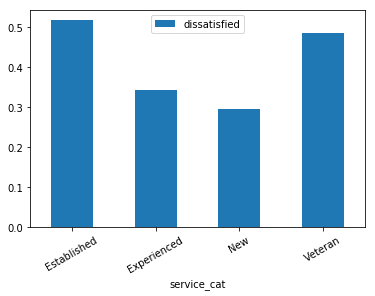

In [359]:
dissatisfied_pct = pd.pivot_table(combined_updated, values='dissatisfied', index=['service_cat'])

%matplotlib inline
print(dissatisfied_pct)
dissatisfied_pct.plot(kind='bar', rot=30)

# Conclusion

From our preliminary analysis we can observe that a greater percentage of employees in the two surveys report a highest dissatisfaction with their position the longer they stay in the position. This is not a linear relationship as the Veteran group is slightly less dissatisfied than the Established group. Interestingly the biggest jump in dissatsifaction seems to be between Experienced (3-7)years and Established(7-11) years. This could possibly be due to a feeling of resentment with career prospects that eventually resolves into acceptance. Alternatively it is possible that a number of employees resign after a certain time period of dissatisfaction with a company. It could also be an artifact of the survey and further research and analysis would be needed to identify the effect. It might be prudent to explore whether or not there is a common driving factor in the Established group that motivated this change. At a later point I will return to this to explore whether or not age is correlated to dissatisfaction.